In [1]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
from sklearn.model_selection import train_test_split
from ISLP import confusion_table

In [2]:
from functools import partial
from sklearn.model_selection import \
     (cross_validate,
      KFold,
      ShuffleSplit)
from sklearn.base import clone
from ISLP.models import sklearn_sm

In [3]:
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.pipeline import Pipeline
from ISLP.models import \
     (Stepwise,
      sklearn_selected,
      sklearn_selection_path)
from l0bnb import fit_path

In [5]:
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss)

In [6]:
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm

# 9.

 This problem involves the OJ data set which is part of the ISLP
package.

In [43]:
OJ = load_data('OJ')
OJ

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.00,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.30,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.00,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.00,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.00,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,CH,252,7,1.86,2.09,0.10,0.00,0,0,0.587822,2.09,1.76,0.33,Yes,0.000000,0.053763,0.23,0
1066,CH,256,7,1.86,2.18,0.00,0.00,0,0,0.670258,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0
1067,MM,257,7,1.86,2.18,0.00,0.00,0,0,0.736206,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0
1068,CH,261,7,1.86,2.13,0.00,0.24,0,0,0.588965,1.89,1.86,0.03,Yes,0.112676,0.000000,0.27,0


Purchase: A factor with levels ‘CH’ and ‘MM’ indicating whether the customer purchased Citrus Hill or Minute Maid Orange Juice

WeekofPurchase: Week of purchase

StoreID: Store ID

PriceCH: Price charged for CH

PriceMM: Price charged for MM

DiscCH: Discount offered for CH

DiscMM: Discount offered for MM

SpecialCH: Indicator of special on CH

SpecialMM: Indicator of special on MM

LoyalCH: Customer brand loyalty for CH

SalePriceMM: Sale price for MM

SalePriceCH: Sale price for CH

PriceDiff: Sale price of MM less sale price of CH

Store7: A factor with levels ‘No’ and ‘Yes’ indicating whether the sale is at Store 7

PctDiscMM: Percentage discount for MM

PctDiscCH: Percentage discount for CH

ListPriceDiff: List price of MM less list price of CH

STORE: Which of 5 possible stores the sale occured at

# a)

In [44]:
model = MS(OJ.columns.drop('Purchase'), intercept=False)
D = model.fit_transform(OJ)
D['Store7'] = D['Store7'].map({'Yes': 1, 'No': 0}) #Modificiram Store7 varijablu ručno jer se nije automatski modificirala
feature_names = list(D.columns)
X = np.asarray(D)
Purchase = np.asarray(OJ['Purchase'],dtype='<U3')

In [45]:
1070-800

270

In [46]:
(X_train,
 X_test,
 Purchase_train,
 Purchase_test) = skm.train_test_split(X,
                                   Purchase,
                                   test_size=270,
                                   random_state=0)
                                   

# b)

In [47]:
clf = DTC(criterion='entropy',
          random_state=0)        
clf.fit(X_train, Purchase_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [48]:
accuracy_score(Purchase_train, clf.predict(X_train))

0.99125

Trening greška je 0.875%

The training error is 0.875%.

# c)

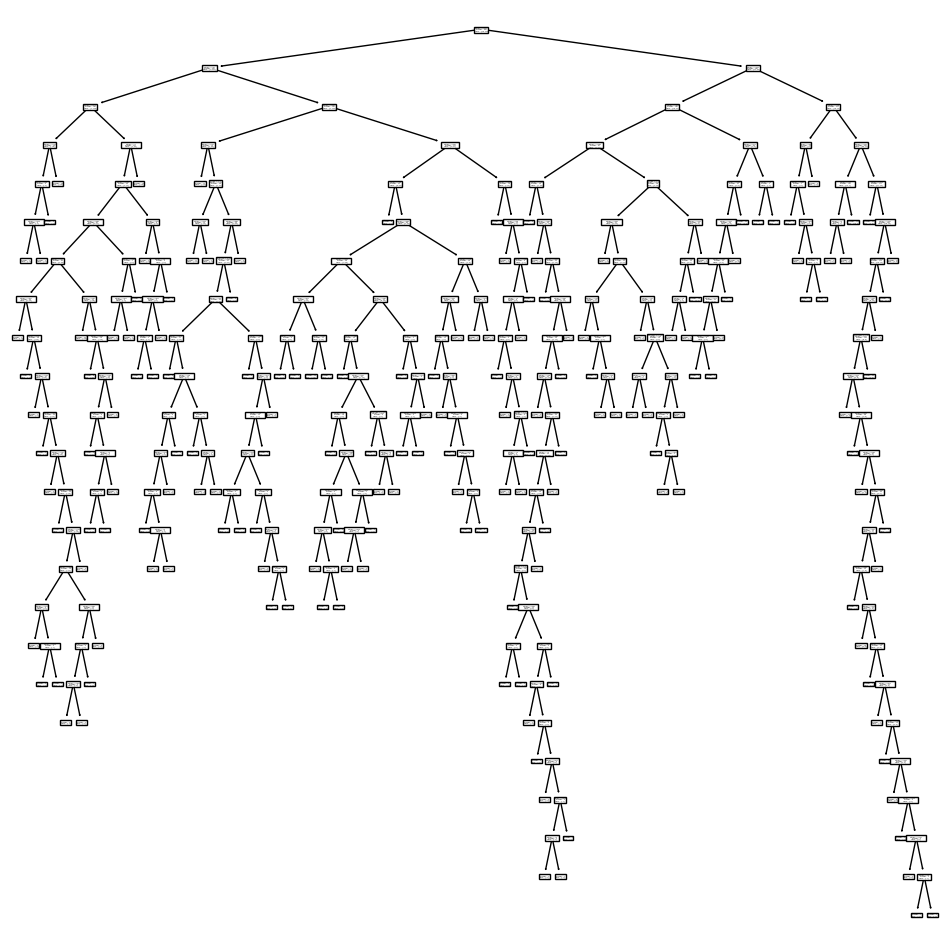

In [49]:
ax = plt.subplots(figsize=(12,12))[1]
plot_tree(clf,
          feature_names=feature_names,
          ax=ax);

#plt.savefig('filename.pdf')

In [50]:
clf.tree_.n_leaves


168

U Jupyteru je teško vidjeti što piše na slici, ali slika se može spremiti kao pdf i onda proučavati, međutim s tako velikim drvom, teško je pratiti što se događa. Drvo ima 168 listova. 

In Jupyter, it is hard to see what is written on the image, but the image can be saved as a PDF and then examined. However, with such a large tree, it is difficult to follow what is happening. The tree has 168 leaves.

# d)

In [51]:
print(export_text(clf,
                  feature_names=feature_names,
                  show_weights=True))

|--- LoyalCH <= 0.51
|   |--- LoyalCH <= 0.28
|   |   |--- LoyalCH <= 0.04
|   |   |   |--- STORE <= 2.50
|   |   |   |   |--- LoyalCH <= 0.00
|   |   |   |   |   |--- WeekofPurchase <= 269.50
|   |   |   |   |   |   |--- weights: [1.00, 0.00] class: CH
|   |   |   |   |   |--- WeekofPurchase >  269.50
|   |   |   |   |   |   |--- weights: [0.00, 2.00] class: MM
|   |   |   |   |--- LoyalCH >  0.00
|   |   |   |   |   |--- weights: [0.00, 3.00] class: MM
|   |   |   |--- STORE >  2.50
|   |   |   |   |--- weights: [0.00, 43.00] class: MM
|   |   |--- LoyalCH >  0.04
|   |   |   |--- WeekofPurchase <= 273.50
|   |   |   |   |--- SalePriceCH <= 1.94
|   |   |   |   |   |--- WeekofPurchase <= 263.50
|   |   |   |   |   |   |--- STORE <= 1.50
|   |   |   |   |   |   |   |--- WeekofPurchase <= 228.00
|   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: CH
|   |   |   |   |   |   |   |--- WeekofPurchase >  228.00
|   |   |   |   |   |   |   |   |--- LoyalCH <= 0.04
|   |   |   |

Fokusirajmo se na najkraći terminal node (prvi tekst po redu). Mušterije u dućanima 1 i 2 s LoyalCH <= 0 i WeekofPurchase <= 269.50 će kupiti CH sok.

Let’s focus on the shortest terminal node (the first text in order). Customers in stores 1 and 2 with LoyalCH ≤ 0 and WeekofPurchase ≤ 269.50 will buy CH juice.

# e)

In [52]:
print(accuracy_score(Purchase_test,
                     clf.predict(X_test)))
confusion = confusion_table(clf.predict(X_test),
                            Purchase_test)
confusion

0.7703703703703704


Truth,CH,MM
Predicted,,
CH,123,32
MM,30,85


In [53]:
(1-0.7703703703703704)*100

22.962962962962962

Greška je 22.96%

Error is 22.96%

# f)

In [54]:
ccp_path = clf.cost_complexity_pruning_path(X_train, Purchase_train)
kfold = skm.KFold(10,
                  random_state=1,
                  shuffle=True)

In [55]:
grid = skm.GridSearchCV(clf,
                        {'ccp_alpha': ccp_path.ccp_alphas},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')
grid.fit(X_train, Purchase_train)
grid.best_score_

0.805

In [56]:
best_ = grid.best_estimator_
best_.tree_.n_leaves

7

# g) 

In [57]:
cv_results = pd.DataFrame(grid.cv_results_)
#print(cv_results[['param_ccp_alpha', 'mean_test_score', 'std_test_score']])

In [58]:
ccp_alphas, impurities = ccp_path.ccp_alphas, ccp_path.impurities
num_leaves = []

for ccp_alpha in ccp_alphas:
    clf = DTC(criterion='entropy', random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, Purchase_train)
    num_leaves.append(clf.tree_.n_leaves)

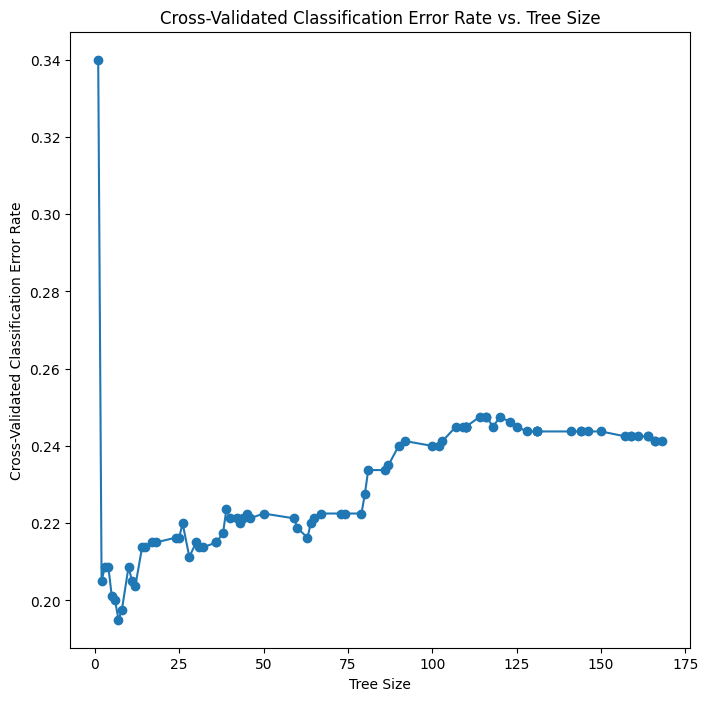

In [59]:
# Plot the results
plt.figure(figsize=(8, 8))
plt.plot(num_leaves, (1-cv_results[ 'mean_test_score']), marker='o')
plt.title('Cross-Validated Classification Error Rate vs. Tree Size')
plt.xlabel('Tree Size')
plt.ylabel('Cross-Validated Classification Error Rate')
plt.show()

# h)

In [60]:
best_ = grid.best_estimator_
best_.tree_.n_leaves

7

Drvo sa 7 listova.

A tree with 7 leaves.

# i)

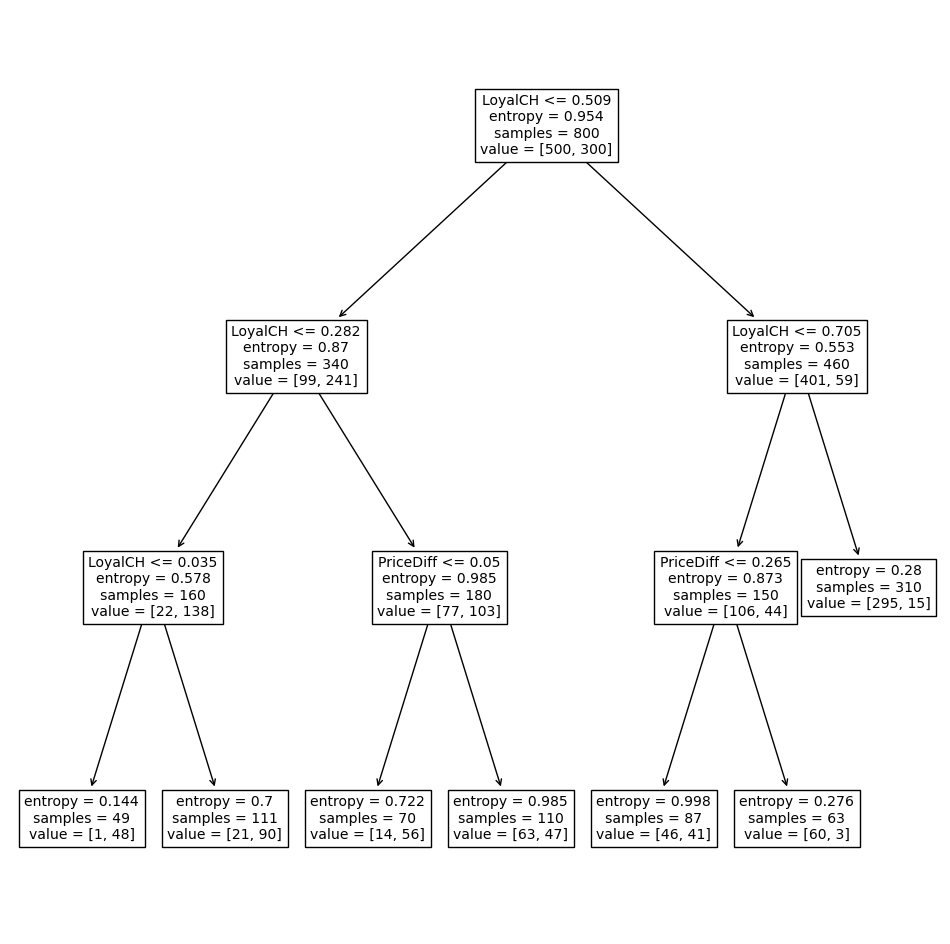

In [61]:
ax = plt.subplots(figsize=(12, 12))[1]
best_ = grid.best_estimator_
plot_tree(best_,
          feature_names=feature_names,
          ax=ax);

# j)

In [62]:
grid.fit(X_train, Purchase_train)
grid.best_score_ # Mean cross-validated score of the best_estimator

0.805

In [63]:
best_ = grid.best_estimator_
best_.tree_.n_leaves

7

In [64]:
print(accuracy_score(Purchase_train,
                     best_.predict(X_train)))
confusion = confusion_table(best_.predict(X_train),
                            Purchase_train)
confusion

0.8225


Truth,CH,MM
Predicted,,
CH,464,106
MM,36,194


In [65]:
print(accuracy_score(Purchase_train,
                     best_.predict(X_train)))
confusion = confusion_table(best_.predict(X_train),
                            Purchase_train)
confusion

0.8225


Truth,CH,MM
Predicted,,
CH,464,106
MM,36,194


In [66]:
(1-0.8225)*100

17.75

Pruned tree train error = 17.75%

Unpruned tree train error =  0.875%

Pruned tree train error > Unpruned tree error

# k)

In [67]:
print(accuracy_score(Purchase_test,
                     best_.predict(X_test)))
confusion = confusion_table(best_.predict(X_test),
                            Purchase_test)
confusion

0.8111111111111111


Truth,CH,MM
Predicted,,
CH,138,36
MM,15,81


In [68]:
(1-0.8111111111111111)*100

18.88888888888889

Pruned tree test error = 18.89%

Unpruned tree test error = 22.96%

Pruned tree test error < Unpruned tree error